# **McCormick Envelope**

Assume in a mathematical model, you have a bilinear term in the form of $x.y$ that $x^L\leq x\leq x^U$ and $y^L\leq y\leq y^U$. The McCormick envelope is a method to linearize this term in the following manner:

1) We need a new variable, $z$.

2) Then, we use the lower and upper bounds of $x$ and $y$.

3) Replace all the $x.y$ terms in the model with $z$.

4) Add these four constraints:

&emsp;&emsp; 4.1) For the lower bound, we have:
<p align="center">$z \geq x^L y + y^L x - x^L y^L,$<p>

<p align="center">$z \geq x^U y + y^U x - x^U y^U,$<p>

&emsp;&emsp; 4.2) For the upper bound, we have:
<p align="center">$z \leq x^U y + y^L x - x^U y^L,$<p>

<p align="center">$z \leq x^L y + y^U x - x^L y^U.$<p>




# **Pooling Problem**

I am going to show you the **McCromick envelope** in an example. The best example for this method is the **Pooling problem**. I am going to use the test problem by *Ben-Tal et al. (1994) Problems*. You can find it in **Nonconvex Optimization and Its Applications** by *Christodoulos A. Floudas et al*. *chapter 5, Bilinear Problems, page 38*.


<br>**Problem Description**

This example is consists of four feeds, one pool, and two products. The quality of only one component is monitored. The following restrictions are imposed on the problem:
feeds 1, 2, and 4 can be sent to the pool, and feed 3 cannot. Thus, there
are only three $q$ variables, $q_{11}$, $q_{21}$, and $q_{41}$, and two $z$ variables, $z_{31}$ and $z_{32}$.<br><br>

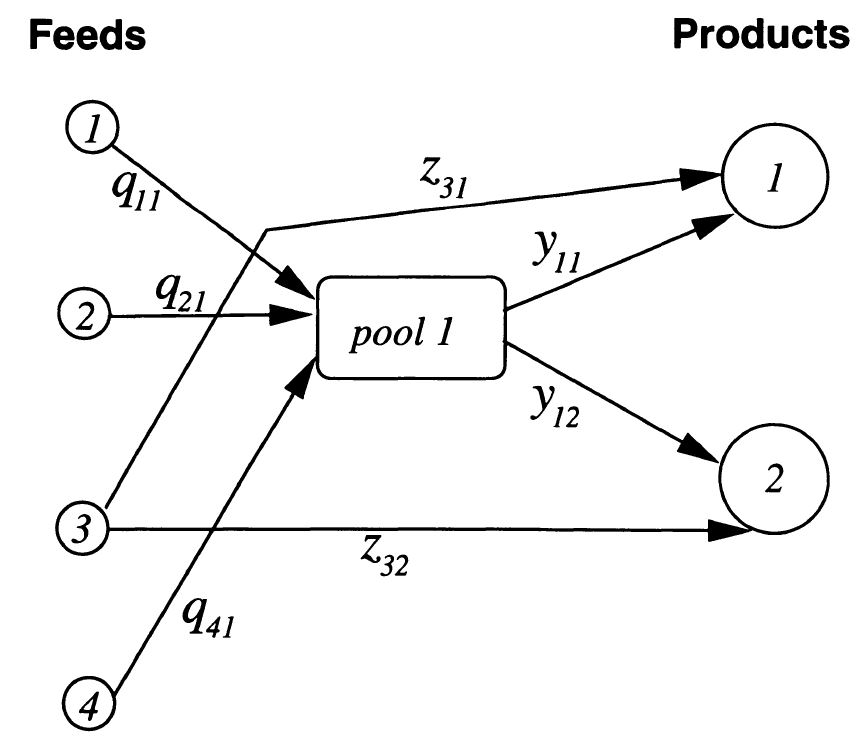

The mathematical model is as follows:

**Formulation**

*Objective function*

<p align="center">$max_{q,y,z} (9-6q_{11}-16q_{21}-15q_{41})y_{11} + (15-6q_{11}-16q_{21}-15q_{41})y_{12} -z_{31} + 5z_{32}$<p>

<br>*s.t:*
<p align="center">$q_{41}y_{11}+q_{41}y_{12}\leq50$<p>
<p align="center">$y_{11}+z_{31}\leq100$<p>
<p align="center">$y_{12}+z_{32}\leq200$<p>
<p align="center">$(3q_{11}+q_{21}+q_{41}-2.5)y_{11}-0.5z_{31}\leq0$<p>
<p align="center">$(3q_{11}+q_{21}+q_{41}-1.5)y_{12}+0.5z_{32}\leq0$<p>
<p align="center">$q_{11}+q_{21}+q_{41}=1$<p>

<br>*Variable bounds*
<p align="center">$0\leq q_{11}\leq1$<p>
<p align="center">$0\leq q_{21}\leq1$<p>
<p align="center">$0\leq q_{41}\leq1$<p>
<p align="center">$0\leq y_{11}\leq100$<p>
<p align="center">$0\leq y_{12}\leq200$<p>
<p align="center">$0\leq z_{31}\leq100$<p>
<p align="center">$0\leq z_{32}\leq200$<p>

<br><br>
**Global Solution**
*   Objective function: **450**
*   Continuous variables

<p align="center">$q_{11}=0 ,\quad  q_{21}= 0.5,\quad  q_{41}= 0.5$<p>
<p align="center">$y_{11}= 0,\quad  y_{12}= 100$<p>
<p align="center">$z_{31}= 0,\quad  z_{32}= 100$<p>

There are 6 bilinear terms in this model:
<p align="center">$q_{11}.y_{11}, \quad q_{21}.y_{11}, \quad q_{41}.y_{11}$<p>
<p align="center">$q_{11}.y_{12}, \quad q_{21}.y_{12}, \quad q_{41}.y_{12}$<p>

We have to apply the McCormick envelope to all of these if we want to have a linear model. For example, for the term $q_{11}.y_{11}$, we will have:

<p align="center">$u \geq q_{11}^L y_{11} + y_{11}^L q_{11} - q_{11}^L y_{11}^L,$<p>

<p align="center">$u \geq q_{11}^U y_{11} + y_{11}^U q_{11} - q_{11}^U y_{11}^U,$<p>

<p align="center">$u \leq q_{11}^U y_{11} + y_{11}^L q_{11} - q_{11}^U y_{11}^L,$<p>

<p align="center">$u \leq q_{11}^L y_{11} + y_{11}^U q_{11} - q_{11}^L y_{11}^U.$<p>

By substituting the values:
<p align="center">$u \geq 0,$<p>

<p align="center">$u \geq y_{11} + 100q_{11} - 100,$<p>

<p align="center">$u \leq y_{11},$<p>

<p align="center">$u \leq 100q_{11}$<p>


In [1]:
import shutil
import sys
import os.path
from pyomo.environ import *
if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

In [3]:
os.environ['NEOS_EMAIL'] = 'Your Email'

In [2]:
# Model
def Pooling(McCormick_key=True):
      model = ConcreteModel()

      # Decision Variables
      model.q11 = Var(bounds=(0, 1))
      model.q21 = Var(bounds=(0, 1))
      model.q41 = Var(bounds=(0, 1))

      model.y11 = Var(bounds=(0, 100))
      model.y12 = Var(bounds=(0, 200))

      model.z31 = Var(bounds=(0,100))
      model.z32 = Var(bounds=(0,200))

      #McCormick Variables
      model.u1 = Var(bounds=(0,100))
      model.u2 = Var(bounds=(0,100))
      model.u3 = Var(bounds=(0,100))
      model.u4 = Var(bounds=(0,200))
      model.u5 = Var(bounds=(0,200))
      model.u6 = Var(bounds=(0,200))

      # Parameters
      q11_L, q11_U = 0, 1
      q21_L, q21_U = 0, 1
      q41_L, q41_U = 0, 1

      y11_L, y11_U = 0, 100
      y12_L, y12_U = 0, 200


      if McCormick_key:
          # McCormick Envelope Constraints for z = x * y
          model.mq11y11c1 = Constraint(expr=model.u1 >= q11_L * model.y11 + y11_L * model.q11 - q11_L * y11_L)
          model.mq11y11c2 = Constraint(expr=model.u1 >= q11_U * model.y11 + y11_U * model.q11 - q11_U * y11_U)
          model.mq11y11c3 = Constraint(expr=model.u1 <= q11_L * model.y11 + y11_U * model.q11 - q11_L * y11_U)
          model.mq11y11c4 = Constraint(expr=model.u1 <= q11_U * model.y11 + y11_L * model.q11 - q11_U * y11_L)

          model.mq21y11c1 = Constraint(expr=model.u2 >= q21_L * model.y11 + y11_L * model.q21 - q21_L * y11_L)
          model.mq21y11c2 = Constraint(expr=model.u2 >= q21_U * model.y11 + y11_U * model.q21 - q21_U * y11_U)
          model.mq21y11c3 = Constraint(expr=model.u2 <= q21_L * model.y11 + y11_U * model.q21 - q21_L * y11_U)
          model.mq21y11c4 = Constraint(expr=model.u2 <= q21_U * model.y11 + y11_L * model.q21 - q21_U * y11_L)

          model.mq41y11c1 = Constraint(expr=model.u3 >= q41_L * model.y11 + y11_L * model.q41 - q41_L * y11_L)
          model.mq41y11c2 = Constraint(expr=model.u3 >= q41_U * model.y11 + y11_U * model.q41 - q41_U * y11_U)
          model.mq41y11c3 = Constraint(expr=model.u3 <= q41_L * model.y11 + y11_U * model.q41 - q41_L * y11_U)
          model.mq41y11c4 = Constraint(expr=model.u3 <= q41_U * model.y11 + y11_L * model.q41 - q41_U * y11_L)

          model.mq11y12c1 = Constraint(expr=model.u4 >= q11_L * model.y12 + y12_L * model.q11 - q11_L * y12_L)
          model.mq11y12c2 = Constraint(expr=model.u4 >= q11_U * model.y12 + y12_U * model.q11 - q11_U * y12_U)
          model.mq11y12c3 = Constraint(expr=model.u4 <= q11_L * model.y12 + y12_U * model.q11 - q11_L * y12_U)
          model.mq11y12c4 = Constraint(expr=model.u4 <= q11_U * model.y12 + y12_L * model.q11 - q11_U * y12_L)

          model.mq21y12c1 = Constraint(expr=model.u5 >= q21_L * model.y12 + y12_L * model.q21 - q21_L * y12_L)
          model.mq21y12c2 = Constraint(expr=model.u5 >= q21_U * model.y12 + y12_U * model.q21 - q21_U * y12_U)
          model.mq21y12c3 = Constraint(expr=model.u5 <= q21_L * model.y12 + y12_U * model.q21 - q21_L * y12_U)
          model.mq21y12c4 = Constraint(expr=model.u5 <= q21_U * model.y12 + y12_L * model.q21 - q21_U * y12_L)

          model.mq41y12c1 = Constraint(expr=model.u6 >= q41_L * model.y12 + y12_L * model.q41 - q41_L * y12_L)
          model.mq41y12c2 = Constraint(expr=model.u6 >= q41_U * model.y12 + y12_U * model.q41 - q41_U * y12_U)
          model.mq41y12c3 = Constraint(expr=model.u6 <= q41_L * model.y12 + y12_U * model.q41 - q41_L * y12_U)
          model.mq41y12c4 = Constraint(expr=model.u6 <= q41_U * model.y12 + y12_L * model.q41 - q41_U * y12_L)

          model.cocon1 = Constraint(expr=model.q11 <= model.u1+model.u4)
          model.cocon2 = Constraint(expr=model.q21 <= model.u2+model.u5)
          model.cocon3 = Constraint(expr=model.q41 <= model.u3+model.u6)

          model.cocon4 = Constraint(expr=model.y11 <= model.u1+model.u2+model.u3)
          model.cocon5 = Constraint(expr=model.y12 <= model.u4+model.u5+model.u6)

          model.obj = Objective(expr=9*model.y11 -(6*model.u1+16*model.u2+15*model.u3) + 15*model.y12 -
           (6*model.u4+16*model.u5+15*model.u6)- model.z31+ 5*model.z32, sense=maximize)

          model.con1 = Constraint(expr=model.u3 + model.u6 <= 50)
          model.con4 = Constraint(expr=(3*model.u1+model.u2+model.u3-2.5*model.y11) -0.5*model.z31 <=0)
          model.con5 = Constraint(expr=(3*model.u4+model.u5+model.u6-1.5*model.y12) +0.5*model.z32 <=0)

      else:

          model.con1 = Constraint(expr=model.q41*model.y11 + model.q41*model.y12<=50)
          model.con4 = Constraint(expr=(3*model.q11+model.q21+model.q41-2.5)*model.y11-0.5*model.z31<=0)
          model.con5 = Constraint(expr=(3*model.q11+model.q21+model.q41-1.5)*model.y12+0.5*model.z32<=0)


          model.obj = Objective(expr=(9-6*model.q11-16*model.q21-15*model.q41)*model.y11
                                + (15-6*model.q11-16*model.q21-15*model.q41)*model.y12-model.z31+5*model.z32, sense=maximize)

      model.con2 = Constraint(expr=model.y11+model.z31 <= 100)
      model.con3 = Constraint(expr=model.y12+model.z32 <= 200)
      model.con6 = Constraint(expr=model.q11+model.q21+model.q41==1)

      return model

As you can see in the following solution, $u_1$ is not necessarily equal to $y_{11}*q_{11}$ and the same for other $u$'s. This is completely fine because the McCormick envelope does not enforce this to be the case.

In [4]:
# Solve
model = Pooling(McCormick_key=True)
solver_manager = SolverManagerFactory('neos')
solver_manager.solve(model, opt='cplex')

# Results
print(f"y11: {model.y11.value}")
print(f"y12: {model.y12.value}")
print(f"q11: {model.q11.value}")
print(f"q21: {model.q21.value}")
print(f"q41: {model.q41.value}")
print(f"z31: {model.z31.value}")
print(f"z32: {model.z32.value}")

print(f"u1: {model.u1.value}")
print(f"u2: {model.u2.value}")
print(f"u3: {model.u3.value}")
print(f"u4: {model.u4.value}")
print(f"u5: {model.u5.value}")
print(f"u6: {model.u6.value}")


print(f"Objective function: {model.obj()}")

y11: 50.0
y12: 100.0
q11: 0.5
q21: 0.25
q41: 0.25
z31: 50.0
z32: 100.0
u1: 50.0
u2: 0.0
u3: 0.0
u4: 0.0
u5: 50.0
u6: 50.0
Objective function: 550.0


Now, let's solve the original problem using a nonlinear solver. The solution is the same as the solution mentioned in the reference.

In [5]:
# Solve
model = Pooling(McCormick_key=False)
solver_manager = SolverManagerFactory('neos')
solver_manager.solve(model, opt='ipopt')

# Results
print(f"y11: {model.y11.value}")
print(f"y12: {model.y12.value}")
print(f"q11: {model.q11.value}")
print(f"q21: {model.q21.value}")
print(f"q41: {model.q41.value}")
print(f"z31: {model.z31.value}")
print(f"z32: {model.z32.value}")

print(f"Objective function: {model.obj()}")

y11: -9.440134786605946e-09
y12: 99.99999899229707
q11: -9.98747048182901e-09
q21: 0.49999999992681404
q41: 0.5000000100606564
z31: 1.1444595141563348e-08
z32: 100.00000300644996
Objective function: 450.00000660461274


The difference between the solutions obtained using the linear and the nonlinear model is as follows:

McCormick: $y_{11}=50, \quad y_{12}=100, \quad q_{11}=0.5, \quad q_{12}=0.25, \quad q_{41}=0.25, \quad z_{31}=50, \quad z_{32}=100, \quad Objective=450$

<br>Nonlinear programming: $y_{11}=0, \quad y_{12}=100, \quad q_{11}=0, \quad q_{12}=0.5, \quad q_{41}=0.5, \quad z_{31}=0, \quad z_{32}=100, \quad Objective=550$